In [1]:
attach(airquality)
head(airquality)

Ozone,Solar.R,Wind,Temp,Month,Day
41,190,7.4,67,5,1
36,118,8.0,72,5,2
12,149,12.6,74,5,3
18,313,11.5,62,5,4
NA,NA,14.3,56,5,5
28,NA,14.9,66,5,6


In [2]:
# Drop all NA
# Imputation - Replace with Median/mean  Or Mode


In [3]:
newdf <- airquality
head(newdf)

Ozone,Solar.R,Wind,Temp,Month,Day
41,190,7.4,67,5,1
36,118,8.0,72,5,2
12,149,12.6,74,5,3
18,313,11.5,62,5,4
NA,NA,14.3,56,5,5
28,NA,14.9,66,5,6


In [6]:
#is.na 
#str(newdf)
# 153 obs. of  6 variables = 918

sum(is.na(newdf))

mean(is.na(newdf))

[1] 44

[1] 0.04793028

In [7]:
table(is.na(newdf))


FALSE  TRUE 
  874    44 

In [8]:
summary(newdf)

     Ozone           Solar.R           Wind             Temp      
 Min.   :  1.00   Min.   :  7.0   Min.   : 1.700   Min.   :56.00  
 1st Qu.: 18.00   1st Qu.:115.8   1st Qu.: 7.400   1st Qu.:72.00  
 Median : 31.50   Median :205.0   Median : 9.700   Median :79.00  
 Mean   : 42.13   Mean   :185.9   Mean   : 9.958   Mean   :77.88  
 3rd Qu.: 63.25   3rd Qu.:258.8   3rd Qu.:11.500   3rd Qu.:85.00  
 Max.   :168.00   Max.   :334.0   Max.   :20.700   Max.   :97.00  
 NA's   :37       NA's   :7                                       
     Month            Day      
 Min.   :5.000   Min.   : 1.0  
 1st Qu.:6.000   1st Qu.: 8.0  
 Median :7.000   Median :16.0  
 Mean   :6.993   Mean   :15.8  
 3rd Qu.:8.000   3rd Qu.:23.0  
 Max.   :9.000   Max.   :31.0  
                               

In [9]:
# list rows of data that have missing values 
newdf[!complete.cases(newdf),]  # !

,Ozone,Solar.R,Wind,Temp,Month,Day
5,NA,NA,14.3,56,5,5
6,28,NA,14.9,66,5,6
10,NA,194,8.6,69,5,10
11,7,NA,6.9,74,5,11
25,NA,66,16.6,57,5,25
26,NA,266,14.9,58,5,26
27,NA,NA,8.0,57,5,27
32,NA,286,8.6,78,6,1
33,NA,287,9.7,74,6,2
34,NA,242,16.1,67,6,3


In [10]:
sum(!complete.cases(newdf))

[1] 42

In [11]:
newdf2 <- na.omit(newdf) 
str(newdf2)

'data.frame':	111 obs. of  6 variables:
 $ Ozone  : int  41 36 12 18 23 19 8 16 11 14 ...
 $ Solar.R: int  190 118 149 313 299 99 19 256 290 274 ...
 $ Wind   : num  7.4 8 12.6 11.5 8.6 13.8 20.1 9.7 9.2 10.9 ...
 $ Temp   : int  67 72 74 62 65 59 61 69 66 68 ...
 $ Month  : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Day    : int  1 2 3 4 7 8 9 12 13 14 ...
 - attr(*, "na.action")= 'omit' Named int  5 6 10 11 25 26 27 32 33 34 ...
  ..- attr(*, "names")= chr  "5" "6" "10" "11" ...


In [12]:
# 153 obs. of  6 variables = 918

# 111 obs. of  6 variables: - na.omit


In [14]:
x <- newdf$Ozone
#mean(x) # returns NA

mean(x, na.rm=TRUE) # returns 42

[1] 42.12931

In [15]:
y <- newdf$Solar.R
#mean(x) # returns NA

mean(y, na.rm=TRUE)

[1] 185.9315

Loading required package: Rcpp
Warning message:
"package 'Rcpp' was built under R version 3.5.3"## 
## Amelia II: Multiple Imputation
## (Version 1.7.5, built: 2018-05-07)
## Copyright (C) 2005-2019 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 


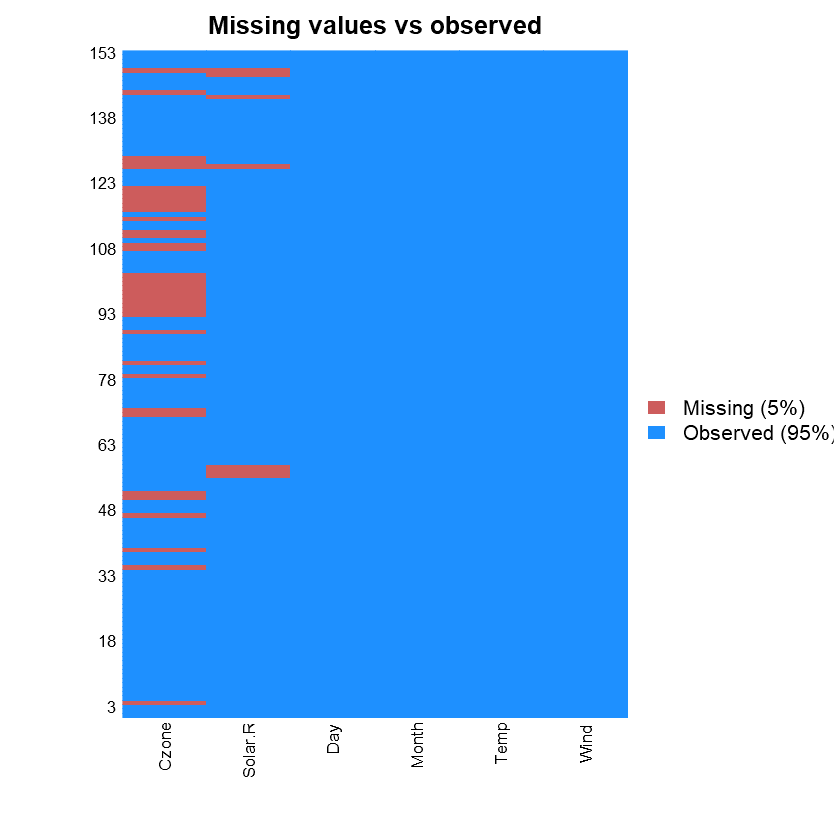

In [16]:
library(Amelia)
missmap(newdf, main = "Missing values vs observed")

Loading required package: colorspace
Loading required package: grid
Loading required package: data.table
VIM is ready to use. 
 Since version 4.0.0 the GUI is in its own package VIMGUI.

          Please use the package to use the new (and old) GUI.

Suggestions and bug-reports can be submitted at: https://github.com/alexkowa/VIM/issues

Attaching package: 'VIM'

The following object is masked from 'package:datasets':

    sleep



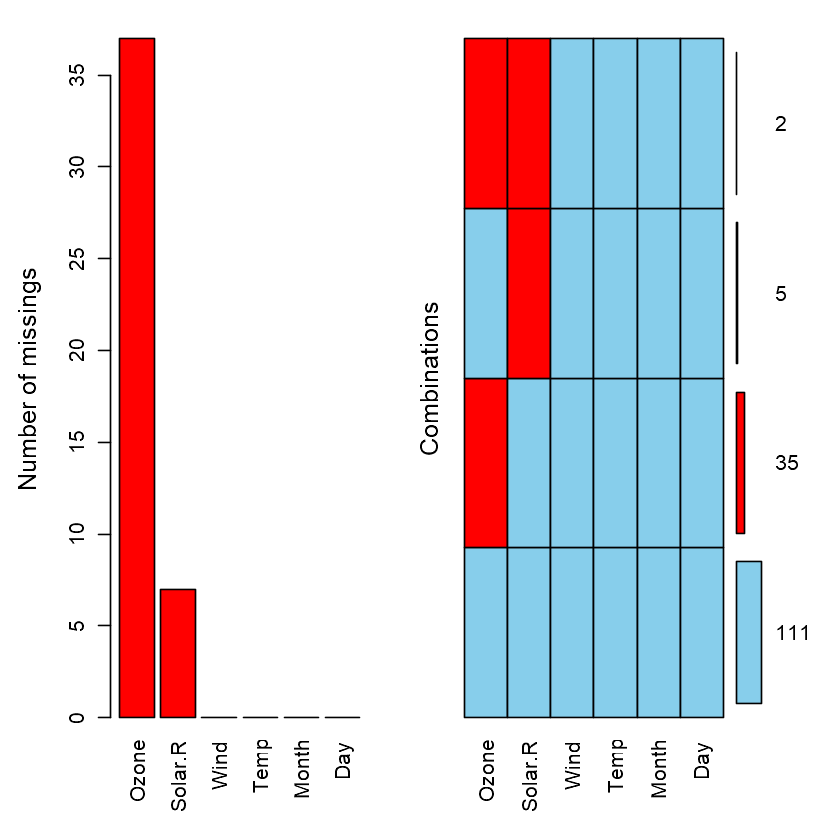

In [17]:
library(VIM)
## in number
aggr(newdf, prop = F, numbers = T)

In [18]:
newdf$Ozone[is.na(newdf$Ozone)]

[1] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[26] NA NA NA NA NA NA NA NA NA NA NA NA

In [19]:
newdf$Ozone[is.na(newdf$Ozone)] <- mean(newdf$Ozone,na.rm=T) # Missingvalue replace


In [20]:
newdf$Solar.R[is.na(newdf$Solar.R)] <- median(newdf$Solar.R,na.rm=T) # Missingvalue replace

In [21]:
table(is.na(newdf))


FALSE 
  918 

In [22]:
newdf[!complete.cases(newdf),]

Ozone,Solar.R,Wind,Temp,Month,Day


In [23]:
# all values are imputed successfully

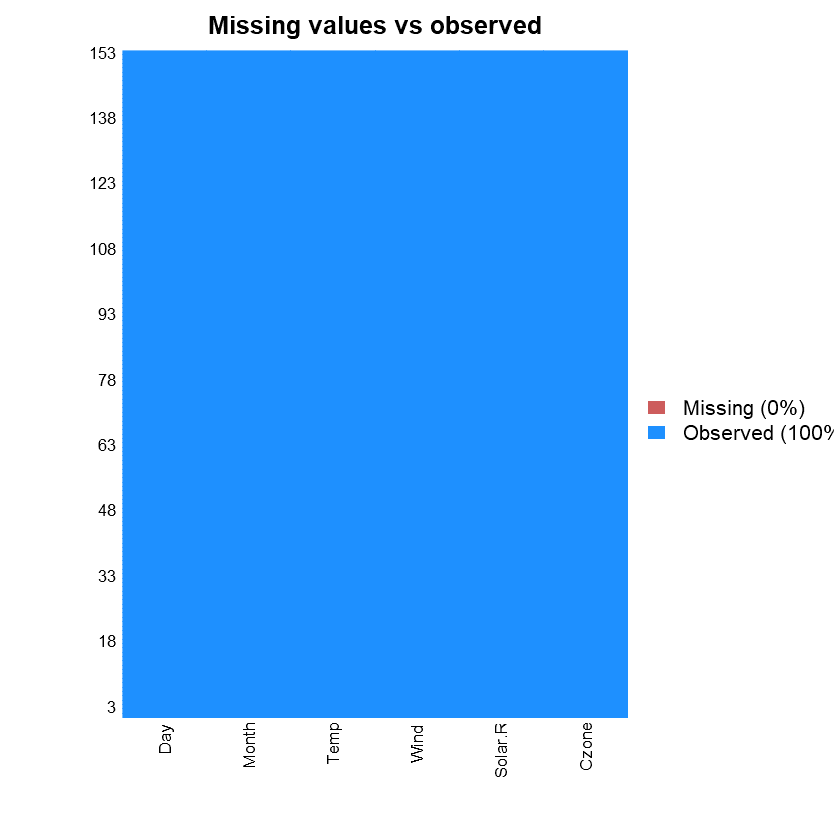

In [24]:
library(Amelia)
missmap(newdf, main = "Missing values vs observed")

In [25]:
# Create the function.
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}
getmode(newdf$Month)

[1] 5

In [26]:
# based on Mode
#newdf$Month[is.na(newdf$Month)] <- 5 # Missingvalue replace

#newdf$Month[is.na(newdf$Month)] <- getmode(newdf$Month)